# MATH 441 Discrete Optimization Problems

## October 11, 2022

* Travelling Salesperson Problem (TSP)
* Brute Force
* Nearest Neighbor

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## TSP (or Routing Problem)

Let $V$ be a set of nodes and let $c_{ij}$ be the cost (or distance) to travel from node $i$ to node $j$. A **tour** is a sequence of nodes such that each node is visited exactly once. The cost of a tour is the sum of the costs of each edge $c_{ij}$ in the tour including the last step to return to the initial node. The TSP (or routing problem) is to find the tour with the minimum cost.

In combinatorial optimization, the brute force method is to enumerate all possible solutions and then find the optimal solution. Check out the [Coding Train](https://www.youtube.com/watch?v=BAejnwN4Ccw) for a great demonstration on how to visualize and implement the brute force method. See also [Google OR Tools](https://developers.google.com/optimization/routing) for more optimization examples.

**Question.** How many tours are there in the routing problem?

Let $n = |V|$ be the number of nodes then we have $(n-1)!/2$ tours when we consider a tour is independent of starting point and direction.

In [2]:
from scipy.special import factorial

In [3]:
n = 40
factorial(n-1)/2

1.0198941040598721e+46

**Question.** How is the routing problem different from network flow problem? They are both minimizing moving stuff around a network but the routing problem is so much harder!

## Brute Force

Write a function called `brute_force` which takes a matrix $V$ with 2 columns representing nodes in a graph and returns the optimal tour (computed by brute force) as a sequence of indices (as a NumPy array) and the total cost.

In [4]:
from itertools import permutations

def cost_matrix(V):
    n = V.shape[0]
    C = np.zeros((n,n))
    for i in range(1,n):
        for j in range(0,i):
            C[i,j] = la.norm(V[i,:] - V[j,:])
            C[j,i] = C[i,j]
    return C

def tour_cost(C,tour):
    n = len(tour)
    cost = 0
    for i in range(n-1):
        cost += C[tour[i],tour[i+1]]
    cost += C[tour[-1],tour[0]]
    return cost

def brute_force(V):
    n = V.shape[0]
    tours = permutations(range(n))
    C = cost_matrix(V)
    optimal_cost = None
    for tour in tours:
        cost = tour_cost(C,tour)
        if optimal_cost is None or cost < optimal_cost:
            optimal_cost = cost
            optimal_tour = np.array(tour)
    return optimal_tour,optimal_cost

In [5]:
def plot_tour(V,tour):
    n = len(tour)
    for i in range(n-1):
        plt.plot([V[tour[i],0],V[tour[i+1],0]],[V[tour[i],1],V[tour[i+1],1]],'b')
    plt.plot([V[tour[-1],0],V[tour[0],0]],[V[tour[-1],1],V[tour[0],1]],'b')
    plt.scatter(V[:,0],V[:,1],s=10)
    plt.show()

6.06449510224598


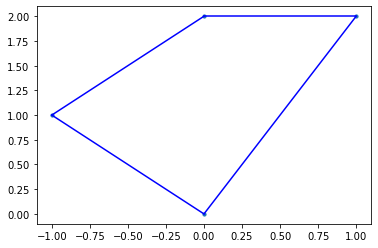

In [6]:
V = np.array([[0,0],[0,2],[1,2],[-1,1]])
optimal_tour, optimal_cost = brute_force(V)
print(optimal_cost)
plot_tour(V,optimal_tour)

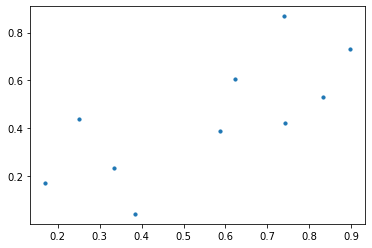

In [7]:
n = 10
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

2.435608709858154


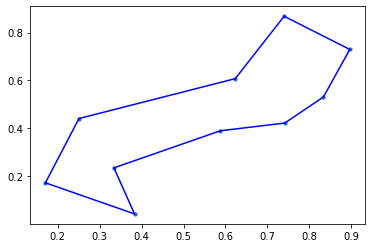

In [8]:
optimal_tour, optimal_cost = brute_force(V)
print(optimal_cost)
plot_tour(V,optimal_tour)

## Nearest Neighbor

If we just want a reasonable tour to start with we can use the nearest neighbor heuristic which construct a tour by picking the closest node as the next node in the tour. Write a funtion called `nearest_neighbor` which takes a matrix $V$ with 2 columns representing nodes in a graph and returns the neighrest neighbor tour as a sequence of indices (as a NumPy array) and the total cost.

In [9]:
def nearest_neighbor(V,start=0):
    n = V.shape[0]
    C = cost_matrix(V)
    tour = [start]
    nodes = list(range(n))
    nodes.remove(start)
    for i in range(1,n):
        next_i = np.argmin(C[tour[-1],nodes])
        next_node = nodes[next_i]
        tour.append(next_node)
        nodes.pop(next_i)
    cost = tour_cost(C,tour)
    return tour,cost

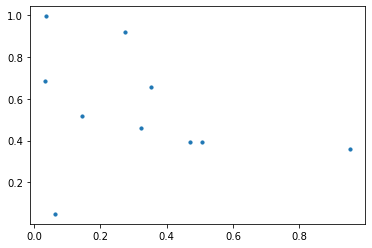

In [10]:
n = 10
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

3.294728143349001


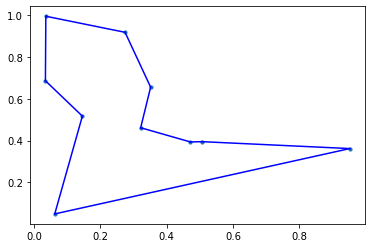

In [11]:
optimal_tour, optimal_cost = brute_force(V)
print(optimal_cost)
plot_tour(V,optimal_tour)

4.027880290101624


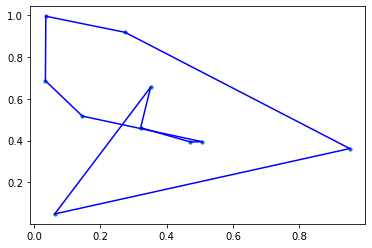

In [12]:
tour,cost = nearest_neighbor(V)
print(cost)
plot_tour(V,tour)

4.274078941328882


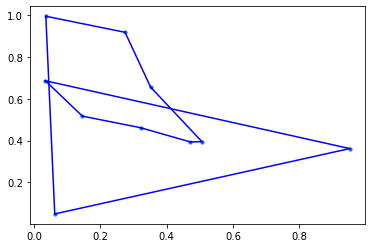

In [13]:
tour,cost = nearest_neighbor(V,start=1)
print(cost)
plot_tour(V,tour)

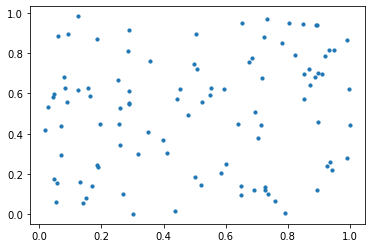

In [14]:
n = 100
V = np.random.rand(n,2)
plt.scatter(V[:,0],V[:,1],s=10)
plt.show()

9.877068704050284


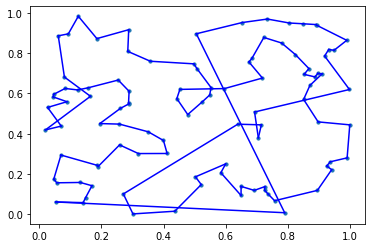

In [15]:
tour,cost = nearest_neighbor(V,start=11)
print(cost)
plot_tour(V,tour)